

# Project: Investigate IMDB Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Selected dataset is the IMDB movie dataset and the popularity/revenue is going to be analysed against budget, genre and runtime

>Following are the questions that will be explored further in the dataset:

>1) How does the revenue correlate with the budget and how the movies are varying with the release dates?

>2) Is popularity increasing with revenue?

>3) How is the comparison between profit of two genres.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Load in the data, check for cleanliness, and then trim and clean your dataset for analysis. 

### General Properties

In [44]:
#  Perform operations to inspect data types and look for instances of missing or possibly errant data.
df=pd.read_csv('https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [45]:
# Dropping columns irrelevant to questions need explored
df.drop(['imdb_id','homepage','tagline','overview','budget_adj','revenue_adj','keywords','cast','director','production_companies'],axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
id                10866 non-null int64
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 933.9+ KB


In [7]:
#dropping null value rows as there very few and wouldn't make much difference to the overall
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 11 columns):
id                10843 non-null int64
popularity        10843 non-null float64
budget            10843 non-null int64
revenue           10843 non-null int64
original_title    10843 non-null object
runtime           10843 non-null int64
genres            10843 non-null object
release_date      10843 non-null object
vote_count        10843 non-null int64
vote_average      10843 non-null float64
release_year      10843 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 1016.5+ KB


In [9]:
df.head(2)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015


In [10]:
df.shape

(10843, 11)

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10843.000000,10843.000000,1.084300e+04,1.084300e+04,10843.000000,10843.000000,10843.000000,10843.000000
mean,65868.491930,0.647456,1.465672e+07,3.990779e+07,102.137508,217.813705,5.973974,2001.315595
std,91977.394803,1.000986,3.093864e+07,1.171131e+08,31.293320,576.155351,0.934260,12.813298
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10589.500000,0.208253,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20558.000000,0.384555,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75182.000000,0.715349,1.500000e+07,2.413675e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


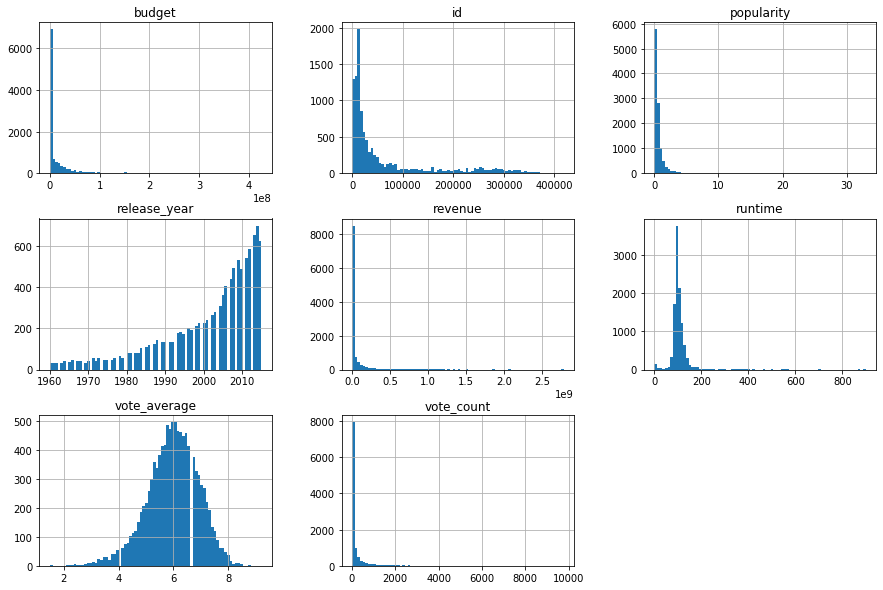

In [12]:
#looking at the overall spread of the data per column
df.hist(figsize=(15,10),bins=80);


### Data Cleaning 

> The budget seems to have an outlier and we can see more about how the data looks below:

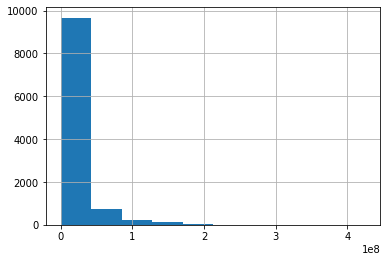

In [13]:
df['budget'].hist();

In [14]:
df['budget'].sort_values(ascending=False).head(8)

2244    425000000
3375    380000000
7387    300000000
14      280000000
6570    270000000
4411    260000000
1929    260000000
7394    258000000
Name: budget, dtype: int64

> The data looks correct, there is almost similar difference between the 4 first values

> Other than the budget everything looks clean and ready to be analyzed

<a id='eda'></a>
## Exploratory Data Analysis

> Compute statistics and create visualizations with the goal of addressing the research question posed in introduction section.


### Research Question 1 
> 1) How does the revenue correlate with the budget and how the movies are varying with the release dates?

> Below is the comparison between budget and revenue to see if there's a correlation between both

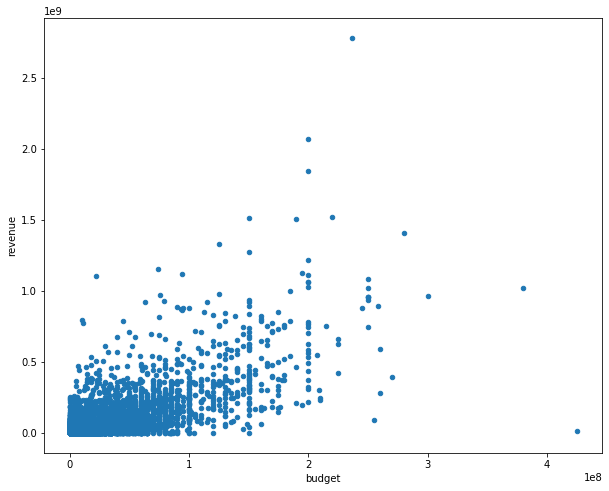

In [15]:
df.plot(x='budget',y='revenue',kind='scatter',figsize=(10,8));

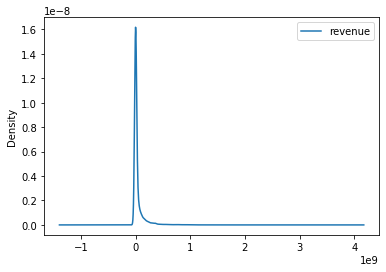

In [16]:
df.plot(x='budget',y='revenue',kind='kde');

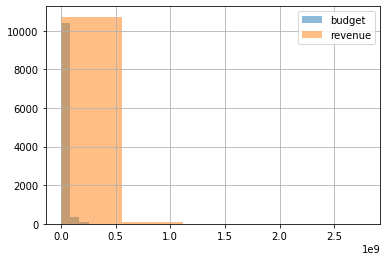

In [17]:
df['budget'].hist(alpha=0.5,bins=5,label='budget')
df['revenue'].hist(alpha=0.5,bins=5,label='revenue')
plt.legend();

In [18]:
df

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
5,281957,9.110700,135000000,532950503,The Revenant,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015
6,87101,8.654359,155000000,440603537,Terminator Genisys,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015
7,286217,7.667400,108000000,595380321,The Martian,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015
8,211672,7.404165,74000000,1156730962,Minions,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015
9,150540,6.326804,175000000,853708609,Inside Out,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015


> By the above histogram, we can say that there is a definite increase in revenue with budget, but is not an even increase of revenue along with revenue. 
> Below is a column with the difference between budget and revenue for each movie

In [19]:
df['profit']=df['revenue']-df['budget']


> Here we can see that the budget and revenue of many movies at the end are '0'

> We are going to drop all the similar rows with zero in either budget or revenue columns

In [20]:
df[df['budget']==0].index.tolist()

[30,
 36,
 72,
 74,
 75,
 88,
 92,
 95,
 100,
 101,
 103,
 116,
 119,
 122,
 125,
 128,
 130,
 132,
 134,
 139,
 140,
 143,
 146,
 147,
 148,
 151,
 152,
 153,
 158,
 161,
 164,
 166,
 169,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 181,
 182,
 185,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 195,
 196,
 197,
 198,
 199,
 201,
 204,
 212,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 224,
 226,
 228,
 231,
 232,
 235,
 236,
 237,
 240,
 241,
 243,
 244,
 245,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 266,
 267,
 269,
 271,
 272,
 273,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 288,
 290,
 292,
 293,
 294,
 295,
 296,
 298,
 299,
 301,
 302,
 303,
 305,
 306,
 307,
 308,
 310,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 326,
 328,
 329,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 351,


In [21]:
df.drop(df[df['budget']==0].index.tolist(),inplace=True)

In [22]:
df.drop(df[df['revenue']==0].index.tolist(),inplace=True)

In [23]:
df

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1316249360
5,281957,9.110700,135000000,532950503,The Revenant,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,397950503
6,87101,8.654359,155000000,440603537,Terminator Genisys,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,285603537
7,286217,7.667400,108000000,595380321,The Martian,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,487380321
8,211672,7.404165,74000000,1156730962,Minions,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,1082730962
9,150540,6.326804,175000000,853708609,Inside Out,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,678708609


> Since the data is a lot cleaner now. We will see how the correlation looks like

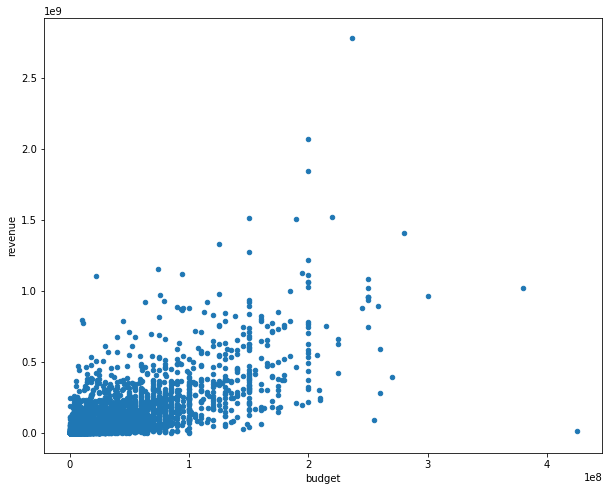

In [24]:
df.plot(x='budget',y='revenue',kind='scatter',figsize=(10,8));

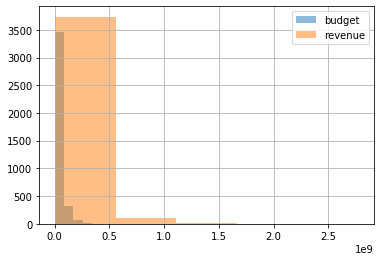

In [25]:
df['budget'].hist(alpha=0.5,bins=5,label='budget')
df['revenue'].hist(alpha=0.5,bins=5,label='revenue')
plt.legend();

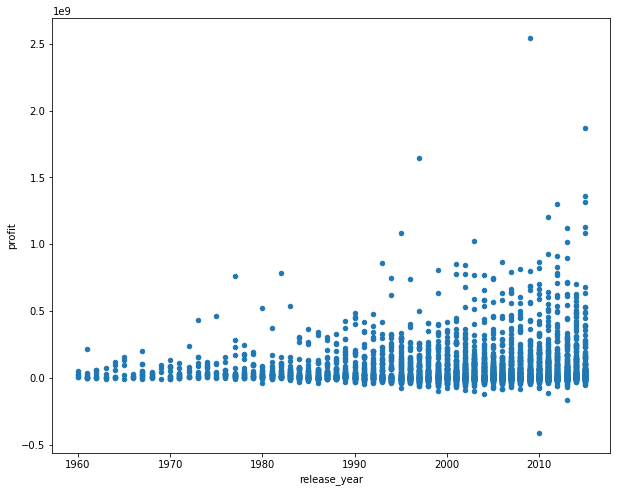

In [26]:
df.plot(x='release_year',y='profit',kind='scatter',figsize=(10,8));

> From above scatter plot, the profit increases with the release year. And also the number of movie releases per year increases

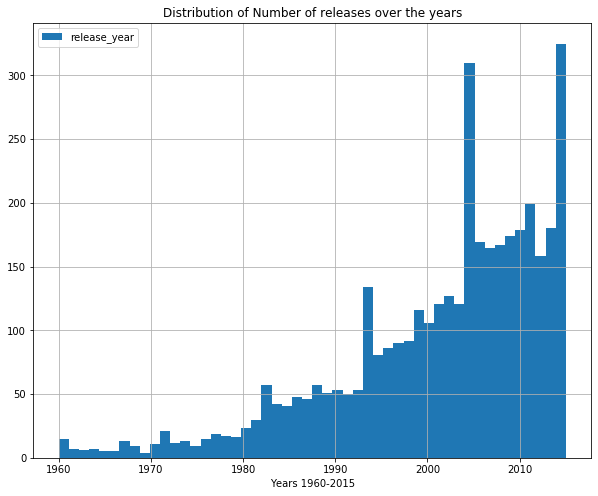

In [27]:
df['release_year'].hist(label='release_year',bins=50,figsize=(10,8))
plt.title('Distribution of Number of releases over the years')
plt.xlabel('Years 1960-2015')
plt.legend();

### Research Question 2  (Is popularity dependant on revenue?)

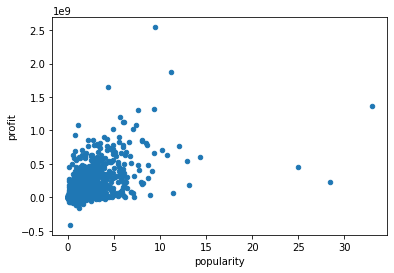

In [28]:
df.plot('popularity','profit',kind='scatter');

> There is an obvious correlation between the profit and popularity with some exceptions

### Research Question 3  (Which genres get the most profit?)
> Analysing only Animation and Adventure

In [29]:
df.head(10)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1316249360
5,281957,9.110700,135000000,532950503,The Revenant,156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,397950503
6,87101,8.654359,155000000,440603537,Terminator Genisys,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,285603537
7,286217,7.667400,108000000,595380321,The Martian,141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,487380321
8,211672,7.404165,74000000,1156730962,Minions,91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,1082730962
9,150540,6.326804,175000000,853708609,Inside Out,94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,678708609


In [30]:
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
profit              int64
dtype: object

In [31]:
df['genres'] = df['genres'].astype('|S')

In [32]:
df.dtypes

id                  int64
popularity        float64
budget              int64
revenue             int64
original_title     object
runtime             int64
genres             object
release_date       object
vote_count          int64
vote_average      float64
release_year        int64
profit              int64
dtype: object

In [33]:
df['genres'] = df['genres'].astype('str')
df['genres_new'] = df['genres'].str.split('|')
df.head(15)

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit,genres_new
0,135397,32.985763,150000000,1513528810,Jurassic World,124,b'Action|Adventure|Science Fiction|Thriller',6/9/15,5562,6.5,2015,1363528810,"[b'Action, Adventure, Science Fiction, Thriller']"
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,b'Action|Adventure|Science Fiction|Thriller',5/13/15,6185,7.1,2015,228436354,"[b'Action, Adventure, Science Fiction, Thriller']"
2,262500,13.112507,110000000,295238201,Insurgent,119,b'Adventure|Science Fiction|Thriller',3/18/15,2480,6.3,2015,185238201,"[b'Adventure, Science Fiction, Thriller']"
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,b'Action|Adventure|Science Fiction|Fantasy',12/15/15,5292,7.5,2015,1868178225,"[b'Action, Adventure, Science Fiction, Fantasy']"
4,168259,9.335014,190000000,1506249360,Furious 7,137,b'Action|Crime|Thriller',4/1/15,2947,7.3,2015,1316249360,"[b'Action, Crime, Thriller']"
5,281957,9.110700,135000000,532950503,The Revenant,156,b'Western|Drama|Adventure|Thriller',12/25/15,3929,7.2,2015,397950503,"[b'Western, Drama, Adventure, Thriller']"
6,87101,8.654359,155000000,440603537,Terminator Genisys,125,b'Science Fiction|Action|Thriller|Adventure',6/23/15,2598,5.8,2015,285603537,"[b'Science Fiction, Action, Thriller, Adventure']"
7,286217,7.667400,108000000,595380321,The Martian,141,b'Drama|Adventure|Science Fiction',9/30/15,4572,7.6,2015,487380321,"[b'Drama, Adventure, Science Fiction']"
8,211672,7.404165,74000000,1156730962,Minions,91,b'Family|Animation|Adventure|Comedy',6/17/15,2893,6.5,2015,1082730962,"[b'Family, Animation, Adventure, Comedy']"
9,150540,6.326804,175000000,853708609,Inside Out,94,b'Comedy|Animation|Family',6/9/15,3935,8.0,2015,678708609,"[b'Comedy, Animation, Family']"


In [34]:
df['genres_new'][0]

["b'Action", 'Adventure', 'Science Fiction', "Thriller'"]

In [35]:
adventure=df.genres_new.apply(lambda x:'Adventure' in x )
df[adventure]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit,genres_new
0,135397,32.985763,150000000,1513528810,Jurassic World,124,b'Action|Adventure|Science Fiction|Thriller',6/9/15,5562,6.5,2015,1363528810,"[b'Action, Adventure, Science Fiction, Thriller']"
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,120,b'Action|Adventure|Science Fiction|Thriller',5/13/15,6185,7.1,2015,228436354,"[b'Action, Adventure, Science Fiction, Thriller']"
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,b'Action|Adventure|Science Fiction|Fantasy',12/15/15,5292,7.5,2015,1868178225,"[b'Action, Adventure, Science Fiction, Fantasy']"
5,281957,9.110700,135000000,532950503,The Revenant,156,b'Western|Drama|Adventure|Thriller',12/25/15,3929,7.2,2015,397950503,"[b'Western, Drama, Adventure, Thriller']"
7,286217,7.667400,108000000,595380321,The Martian,141,b'Drama|Adventure|Science Fiction',9/30/15,4572,7.6,2015,487380321,"[b'Drama, Adventure, Science Fiction']"
8,211672,7.404165,74000000,1156730962,Minions,91,b'Family|Animation|Adventure|Comedy',6/17/15,2893,6.5,2015,1082730962,"[b'Family, Animation, Adventure, Comedy']"
10,206647,6.200282,245000000,880674609,Spectre,148,b'Action|Adventure|Crime',10/26/15,3254,6.2,2015,635674609,"[b'Action, Adventure, Crime']"
14,99861,5.944927,280000000,1405035767,Avengers: Age of Ultron,141,b'Action|Adventure|Science Fiction',4/22/15,4304,7.4,2015,1125035767,"[b'Action, Adventure, Science Fiction']"
19,131634,5.476958,160000000,650523427,The Hunger Games: Mockingjay - Part 2,136,b'War|Adventure|Science Fiction',11/18/15,2380,6.5,2015,490523427,"[b'War, Adventure, Science Fiction']"
20,158852,5.462138,190000000,209035668,Tomorrowland,130,b'Action|Family|Science Fiction|Adventure|Myst...,5/19/15,1899,6.2,2015,19035668,"[b'Action, Family, Science Fiction, Adventure,..."


In [36]:
animation=df.genres_new.apply(lambda x:'Animation' in x )
df[animation]

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year,profit,genres_new
8,211672,7.404165,74000000,1156730962,Minions,91,b'Family|Animation|Adventure|Comedy',6/17/15,2893,6.5,2015,1082730962,"[b'Family, Animation, Adventure, Comedy']"
9,150540,6.326804,175000000,853708609,Inside Out,94,b'Comedy|Animation|Family',6/9/15,3935,8.0,2015,678708609,"[b'Comedy, Animation, Family']"
37,105864,3.339135,175000000,331926147,The Good Dinosaur,93,b'Adventure|Animation|Comedy|Family|Fantasy',11/14/15,1087,6.6,2015,156926147,"[b'Adventure, Animation, Comedy, Family, Fanta..."
46,228161,2.976436,135000000,368871007,Home,94,b'Fantasy|Comedy|Animation|Science Fiction|Fam...,3/18/15,1060,6.9,2015,233871007,"[b'Fantasy, Comedy, Animation, Science Fiction..."
76,227973,2.140199,99000000,246233113,The Peanuts Movie,88,b'Adventure|Animation|Comedy|Family',11/5/15,414,6.4,2015,147233113,"[b'Adventure, Animation, Comedy, Family']"
94,309809,1.865007,64000000,97571250,The Little Prince,92,b'Adventure|Animation|Fantasy',7/29/15,423,7.5,2015,33571250,"[b'Adventure, Animation, Fantasy']"
635,177572,8.691294,165000000,652105443,Big Hero 6,102,b'Adventure|Family|Animation|Action|Comedy',10/24/14,4185,7.8,2014,487105443,"[b'Adventure, Family, Animation, Action, Comedy']"
663,82702,3.489106,145000000,609123048,How to Train Your Dragon 2,102,b'Fantasy|Action|Adventure|Animation|Comedy',6/12/14,2152,7.7,2014,464123048,"[b'Fantasy, Action, Adventure, Animation, Come..."
666,137106,3.327799,60000000,469160692,The Lego Movie,100,b'Adventure|Fantasy|Animation|Comedy|Action',2/6/14,2268,7.5,2014,409160692,"[b'Adventure, Fantasy, Animation, Comedy, Acti..."
672,270946,3.007018,132000000,373552094,Penguins of Madagascar,92,b'Family|Animation|Adventure|Comedy',11/22/14,939,6.5,2014,241552094,"[b'Family, Animation, Adventure, Comedy']"


In [37]:
df[adventure].profit.mean()

134785475.97067448

In [38]:
df[animation].profit.mean()

162720381.5882353

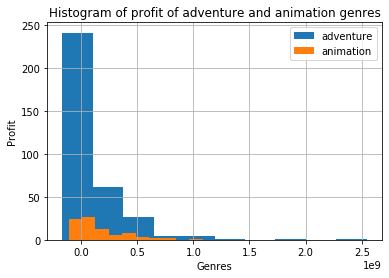

In [39]:
df[adventure].profit.hist(label='adventure')
df[animation].profit.hist(label='animation')
plt.ylabel('Profit')
plt.xlabel('Genres')
plt.title('Histogram of profit of adventure and animation genres')
plt.legend();

In [40]:
barlist=['adventure','animation']
barvalues=[df[adventure].profit.mean(),df[animation].profit.mean()]
barlist,barvalues


(['adventure', 'animation'], [134785475.97067448, 162720381.5882353])

> Below is the bar chart between adventure and animation mean profit over the years.

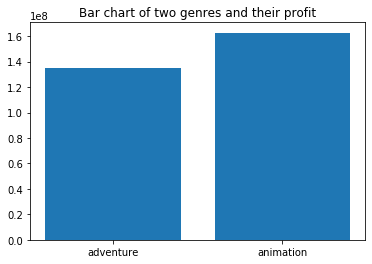

In [41]:
plt.title('Bar chart of two genres and their profit')
plt.bar(barlist, barvalues,width=0.8)
plt.show()

> After analyzing animation and adventure, though adventure category is widely spread the difference between two distinct genres is huge.
> Also, adventure


## Conclusion

> 1) Although there is no statistical inference being led in the code, it shows the correlation between factors and how they vary in relation to another variable.

> 2) There can be more genres and more factors which can be analyzed instead of drawing conclusions from just few factors which might not be very close to the true value.

> 3) More statistical methods can be applied to get more accurate results.

In [42]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0